***Importing Libraries here***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

***Data Cleaning***

In [2]:
# Reading in the dataset
data = pd.read_csv('census7_thurs.csv')
data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Edwards Creek,Kyle,Davis,47.0,Head,Married,Male,Unemployed,NaN,Catholic
1,1,Edwards Creek,Alexandra,Davis,49.0,Wife,Married,Female,"Conservation officer, historic buildings",NaN,Catholic
2,1,Edwards Creek,Michael,Davis,20.0,Son,Single,Male,University Student,NaN,NaN
3,1,Edwards Creek,Malcolm,Davis,16.0,Son,NaN,Male,Student,NaN,NaN
4,2,Edwards Creek,Claire,Humphries,40.0,Head,Married,Female,"Engineer, manufacturing",NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Rice House,Richard,Walters,40.0,Head,Single,Male,Chiropractor,NaN,Christian
10012,1,Rice House,Jade,Barry,38.0,Partner,Single,Female,Data processing manager,NaN,Christian
10013,1,Rice House,Jessica,Walters,0.0,Daughter,NaN,Female,Child,NaN,NaN
10014,1,Rice House,Sean,George,22.0,Lodger,Single,Male,University Student,NaN,NaN


In [3]:
# Checking for null values
data.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     597
Marital Status                   2261
Gender                              0
Occupation                          0
Infirmity                        9935
Religion                         5562
dtype: int64

In [4]:
# Checking the number of unique values in each column
data.nunique()

House Number                      240
Street                            105
First Name                        365
Surname                           664
Age                               118
Relationship to Head of House      20
Marital Status                      5
Gender                              2
Occupation                       1153
Infirmity                           7
Religion                           13
dtype: int64

In [5]:
# Getiing info on the dataset. Datatypes and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   10016 non-null  int64  
 1   Street                         10016 non-null  object 
 2   First Name                     10016 non-null  object 
 3   Surname                        10016 non-null  object 
 4   Age                            10016 non-null  float64
 5   Relationship to Head of House  9419 non-null   object 
 6   Marital Status                 7755 non-null   object 
 7   Gender                         10016 non-null  object 
 8   Occupation                     10016 non-null  object 
 9   Infirmity                      81 non-null     object 
 10  Religion                       4454 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 860.9+ KB


In [6]:
# data['Religion'].isnull().sum()

5562

***Handling missing values***

In [7]:
# Replacing missing values of Marital status and Religion with a placeholder
data['Marital Status'].fillna('Not Specified', inplace=True)
data['Marital Status'].replace(' ','Not Specified', inplace=True)
data['Religion'].fillna('Not Specified', inplace=True)
data['Religion'] = data['Religion'].replace(' ', 'Not Specified')

In [8]:
# data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     597
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                        9935
Religion                            0
dtype: int64

In [9]:
data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Edwards Creek,Kyle,Davis,47.0,Head,Married,Male,Unemployed,NaN,Catholic
1,1,Edwards Creek,Alexandra,Davis,49.0,Wife,Married,Female,"Conservation officer, historic buildings",NaN,Catholic
2,1,Edwards Creek,Michael,Davis,20.0,Son,Single,Male,University Student,NaN,Not Specified
3,1,Edwards Creek,Malcolm,Davis,16.0,Son,Not Specified,Male,Student,NaN,Not Specified
4,2,Edwards Creek,Claire,Humphries,40.0,Head,Married,Female,"Engineer, manufacturing",NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Rice House,Richard,Walters,40.0,Head,Single,Male,Chiropractor,NaN,Christian
10012,1,Rice House,Jade,Barry,38.0,Partner,Single,Female,Data processing manager,NaN,Christian
10013,1,Rice House,Jessica,Walters,0.0,Daughter,Not Specified,Female,Child,NaN,Not Specified
10014,1,Rice House,Sean,George,22.0,Lodger,Single,Male,University Student,NaN,Not Specified


In [9]:
# data['Age'] = data['Age'].astype(int)

In [10]:
# data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Edwards Creek,Kyle,Davis,47,Head,Married,Male,Unemployed,NaN,Catholic
1,1,Edwards Creek,Alexandra,Davis,49,Wife,Married,Female,"Conservation officer, historic buildings",NaN,Catholic
2,1,Edwards Creek,Michael,Davis,20,Son,Single,Male,University Student,NaN,Not Specified
3,1,Edwards Creek,Malcolm,Davis,16,Son,Not Specified,Male,Student,NaN,Not Specified
4,2,Edwards Creek,Claire,Humphries,40,Head,Married,Female,"Engineer, manufacturing",NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Rice House,Richard,Walters,40,Head,Single,Male,Chiropractor,NaN,Christian
10012,1,Rice House,Jade,Barry,38,Partner,Single,Female,Data processing manager,NaN,Christian
10013,1,Rice House,Jessica,Walters,0,Daughter,Not Specified,Female,Child,NaN,Not Specified
10014,1,Rice House,Sean,George,22,Lodger,Single,Male,University Student,NaN,Not Specified


In [11]:
# Checking missing values so far
data.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     597
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                        9935
Religion                            0
dtype: int64

In [12]:
# Getting unique values in the infirmity column
data['Infirmity'].unique()

array([nan, 'Unknown Infection', 'Mental Disability',
       'Physical Disability', ' ', 'Blind', 'Disabled', 'Deaf'],
      dtype=object)

In [13]:
data['Infirmity'].value_counts()

Infirmity
Physical Disability    21
Blind                  18
Mental Disability      11
                        9
Disabled                8
Deaf                    8
Unknown Infection       6
Name: count, dtype: int64

In [14]:
# nan_infirmity = data[data['Infirmity']==' ']
# nan_infirmity.shape

(9, 11)

In [15]:
# data['Infirmity'].isna()

0        True
1        True
2        True
3        True
4        True
         ... 
10011    True
10012    True
10013    True
10014    True
10015    True
Name: Infirmity, Length: 10016, dtype: bool

In [16]:
# Assigning Not Specified to missing infirmity values
data['Infirmity'].fillna('Not Specified', inplace =True)
data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Edwards Creek,Kyle,Davis,47,Head,Married,Male,Unemployed,Not Specified,Catholic
1,1,Edwards Creek,Alexandra,Davis,49,Wife,Married,Female,"Conservation officer, historic buildings",Not Specified,Catholic
2,1,Edwards Creek,Michael,Davis,20,Son,Single,Male,University Student,Not Specified,Not Specified
3,1,Edwards Creek,Malcolm,Davis,16,Son,Not Specified,Male,Student,Not Specified,Not Specified
4,2,Edwards Creek,Claire,Humphries,40,Head,Married,Female,"Engineer, manufacturing",Not Specified,Christian
...,...,...,...,...,...,...,...,...,...,...,...
10011,1,Rice House,Richard,Walters,40,Head,Single,Male,Chiropractor,Not Specified,Christian
10012,1,Rice House,Jade,Barry,38,Partner,Single,Female,Data processing manager,Not Specified,Christian
10013,1,Rice House,Jessica,Walters,0,Daughter,Not Specified,Female,Child,Not Specified,Not Specified
10014,1,Rice House,Sean,George,22,Lodger,Single,Male,University Student,Not Specified,Not Specified


In [17]:
# checking missing values so far
data.isna().sum()

House Number                       0
Street                             0
First Name                         0
Surname                            0
Age                                0
Relationship to Head of House    597
Marital Status                     0
Gender                             0
Occupation                         0
Infirmity                          0
Religion                           0
dtype: int64

In [18]:
# Replacing Marital Status with 'Not Applicable' for individuals under 18 years old
data.loc[data['Age'] < 18, 'Marital Status'] = 'Not Applicable'
data[data['Age'] < 18]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,1,Edwards Creek,Malcolm,Davis,16,Son,Not Applicable,Male,Student,Not Specified,Not Specified
6,2,Edwards Creek,Andrew,Humphries,9,Son,Not Applicable,Male,Student,Not Specified,Not Specified
12,4,Edwards Creek,Vincent,Hope,15,Son,Not Applicable,Male,Student,Not Specified,Not Specified
24,8,Edwards Creek,Terence,Allen,14,Son,Not Applicable,Male,Student,Not Specified,Not Specified
25,8,Edwards Creek,Tracey,Allen,10,Adopted Daughter,Not Applicable,Female,Student,Not Specified,Not Specified
...,...,...,...,...,...,...,...,...,...,...,...
9983,1,Holmes Haven,Natasha,Harrison,15,Daughter,Not Applicable,Female,Student,Not Specified,Not Specified
9986,1,Hussain Institute,Malcolm,Gordon,8,Son,Not Applicable,Male,Student,Not Specified,Not Specified
9987,1,Hussain Institute,Joshua,Gordon,4,Son,Not Applicable,Male,Child,Not Specified,Not Specified
9988,1,Hussain Institute,Naomi,Gordon,2,Daughter,Not Applicable,Female,Child,Not Specified,Not Specified


In [20]:
# data.isna().sum()

House Number                       0
Street                             0
First Name                         0
Surname                            0
Age                                0
Relationship to Head of House    597
Marital Status                     0
Gender                             0
Occupation                         0
Infirmity                          0
Religion                           0
dtype: int64

In [19]:
#subset of the DataFrame where 'Relationship to Head of House' is null
data[data['Relationship to Head of House'].isnull()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
14,5,Edwards Creek,Kerry,Chandler,42,NaN,Single,Female,Radiation protection practitioner,Not Specified,Not Specified
15,5,Edwards Creek,Wayne,Chamberlain,41,NaN,Single,Male,"Producer, radio",Not Specified,Methodist
16,5,Edwards Creek,Leah,Pearson,35,NaN,Single,Female,"Social research officer, government",Not Specified,Christian
17,5,Edwards Creek,Olivia,Carr,56,NaN,Single,Female,Theatre stage manager,Not Specified,Not Specified
77,24,Edwards Creek,Kathleen,Joyce,42,NaN,Single,Female,Community development worker,Not Specified,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
9900,124,York Lane,Louis,Reed,23,NaN,Single,Male,Special effects artist,Not Specified,Not Specified
9972,1,Smith House,Carolyn,Cooper,58,NaN,Single,Female,Broadcast engineer,Not Specified,Christian
9973,1,Smith House,Vanessa,Glover,37,NaN,Single,Female,Arboriculturist,Not Specified,Christian
9974,1,Smith House,Louise,Rhodes,21,NaN,Single,Female,University Student,Not Specified,Not Specified


In [20]:
# Assigning Not Soecified to missing Relationship to head of house values
data['Relationship to Head of House'].fillna('Not Specified', inplace=True)

In [21]:
#  Final view of dataset after the data cleaning process
print(data.isna().sum())
print(data.info())

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10016 non-null  int64 
 1   Street                         10016 non-null  object
 2   First Name                     10016 non-null  object
 3   Surname                        10016 non-null  object
 4   Age                            10016 non-null  int32 
 5   Relationship to Head of House  10016 non-null  object
 6   Marital Status  

***End of Data cleaning***

***Analysis for report***

In [25]:
# Viewing the top 10 most common occupations in the data
data['Occupation'].value_counts().head(10)

Occupation
Student                            1880
Unemployed                          640
University Student                  605
Child                               511
Surgeon                              18
Textile designer                     18
Retail buyer                         18
Research officer, trade union        17
Geophysicist/field seismologist      17
Clothing/textile technologist        17
Name: count, dtype: int64

C:\Users\samue\AppData\Local\Temp\ipykernel_2228\901450239.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks_labels)


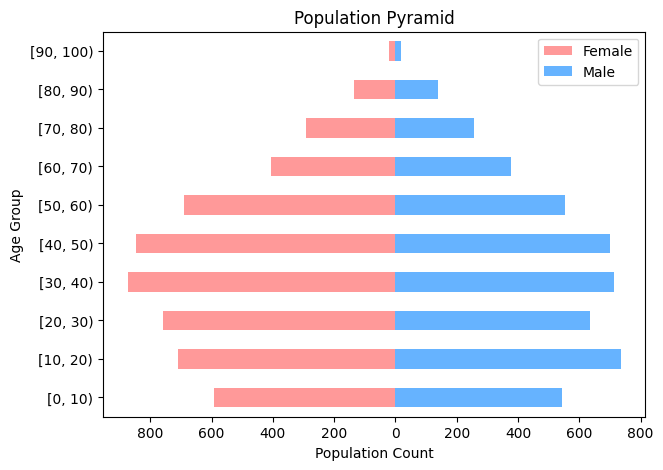

In [142]:
# This cell contains codes that plot the population pyramd of our data
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
# Create age bins
data['Age Group'] = pd.cut(data['Age'], bins=range(0, 101, 10), right=False)
# Count the number of individuals in each age group by gender
age_gender_distribution = data.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)
# Negate the values for one gender for the pyramid effect
age_gender_distribution['Female'] = -age_gender_distribution['Female']
# creating the population pyramid
fig, ax = plt.subplots(figsize=(7,5))
age_gender_distribution.plot(kind='barh', stacked=True, color=['#ff9999','#66b3ff'], ax=ax)
ax.set_xlabel('Population Count')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid')
ax.legend(["Female", "Male"], loc='upper right')
# Correct the x-axis labels to help avoid negative values in the numbering
xticks_labels = abs(ax.get_xticks()).astype(int)
ax.set_xticklabels(xticks_labels)
plt.savefig('figure1')
plt.show()

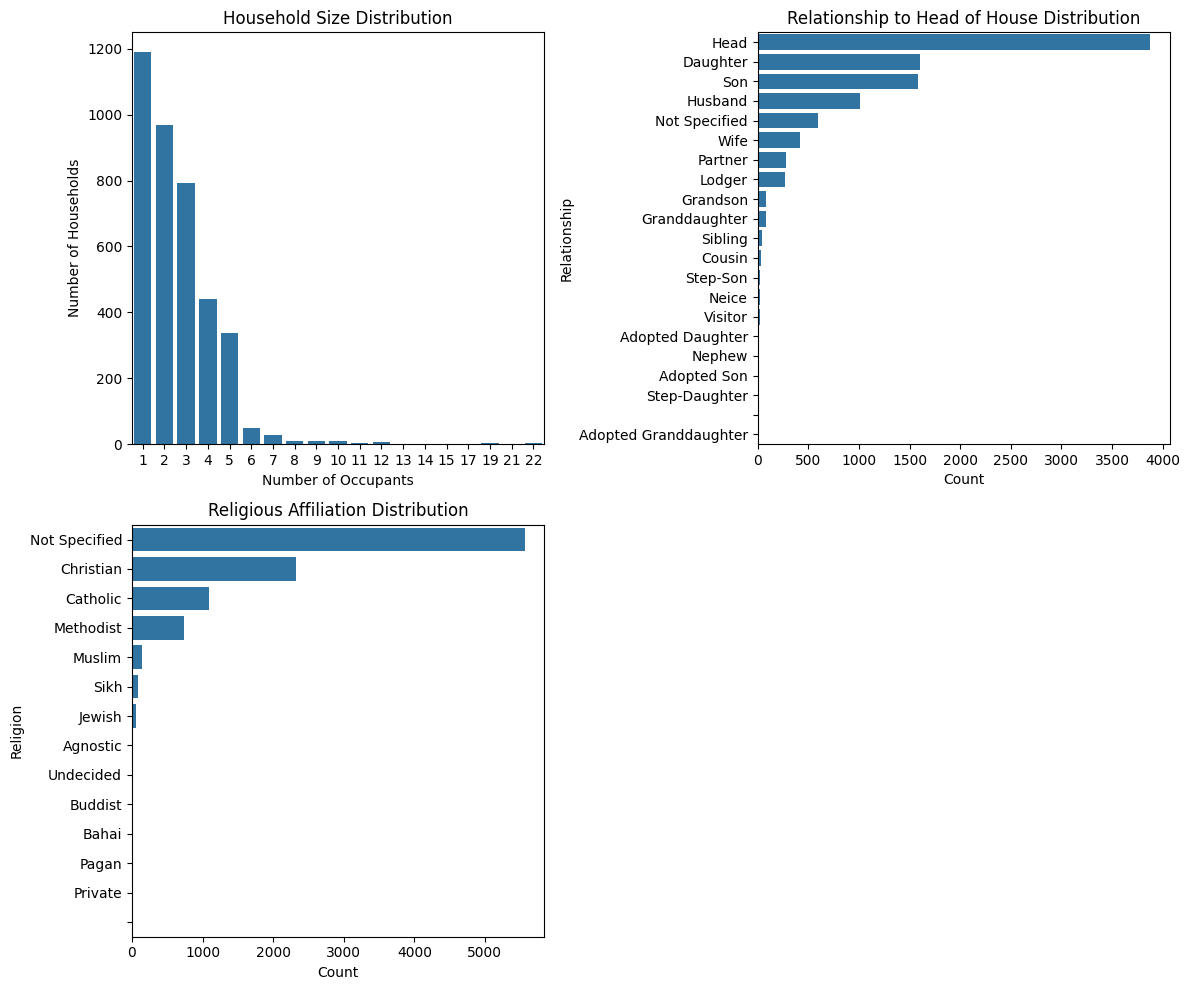

In [35]:
# Codes in this cell provide subplots of Household, Relationship to head of house, Religious affilation Distributions.
household_sizes = data.groupby(['Street', 'House Number']).size()
household_size_distribution = household_sizes.value_counts().sort_index()

# Relationship to Head of House Distribution
relationship_distribution = data['Relationship to Head of House'].value_counts()

# Religious Affiliation Distribution
religion_distribution = data['Religion'].value_counts()
# Set up the matplotlib figure for a 2x2 subplot layout, we'll leave one empty
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=False, sharey=False)
# Flatten the array of axes for easy iteration
axs = axs.ravel()

# Number of Household Distribution
sns.barplot(x=household_size_distribution.index, y=household_size_distribution.values, ax=axs[0])
axs[0].set_title('Household Size Distribution')
axs[0].set_xlabel('Number of Occupants')
axs[0].set_ylabel('Number of Households')

# Relationship to Head of House Distribution
sns.barplot(y=relationship_distribution.index, x=relationship_distribution.values, ax=axs[1])
axs[1].set_title('Relationship to Head of House Distribution')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Relationship')

# Religious Affiliation Distribution
sns.barplot(y=religion_distribution.index, x=religion_distribution.values, ax=axs[2])
axs[2].set_title('Religious Affiliation Distribution')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Religion')
axs[3].remove()
plt.tight_layout()
plt.show()

In [42]:
# Viewing the numbers of household distribution
household_size_distribution

1     1190
2      967
3      791
4      440
5      336
6       48
7       27
8       11
9        9
10       9
11       3
12       6
13       2
14       1
15       1
17       1
19       3
21       1
22       4
Name: count, dtype: int64

In [ ]:
# saving the data to a csv file
data.to_csv('data.csv',index=False)

Extensive Household Analysis

In [40]:
# Calculate household sizes
household_sizes = data.groupby(['House Number', 'Street']).size()
# Calculate the average number of people per household
average_household_size = household_sizes.mean()
print(f'Average number of people per household: {average_household_size:.2f}')


Average number of people per household: 2.60


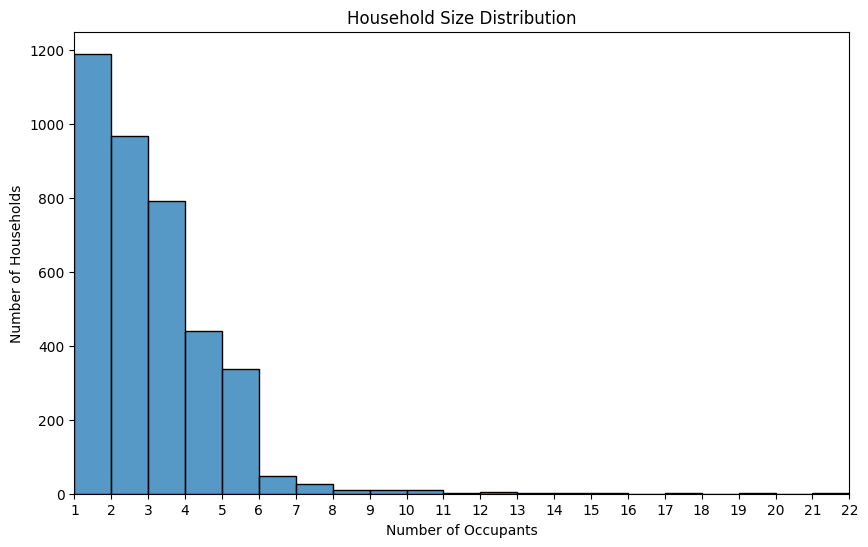

In [143]:
# Grouping the data by house number and street address to count the number of houses in the town
household_sizes = data.groupby(['House Number', 'Street']).size()

# Plotting the distribution of household sizes
plt.figure(figsize=(10, 6))
sns.histplot(household_sizes, bins=range(1, household_sizes.max()+2), stat='count')
plt.title('Household Size Distribution')
plt.xlabel('Number of Occupants')
plt.ylabel('Number of Households')  
plt.xlim(1, household_sizes.max()) 
plt.xticks(range(1, household_sizes.max()+1)) 
plt.savefig('household_sizes.png')
plt.show()


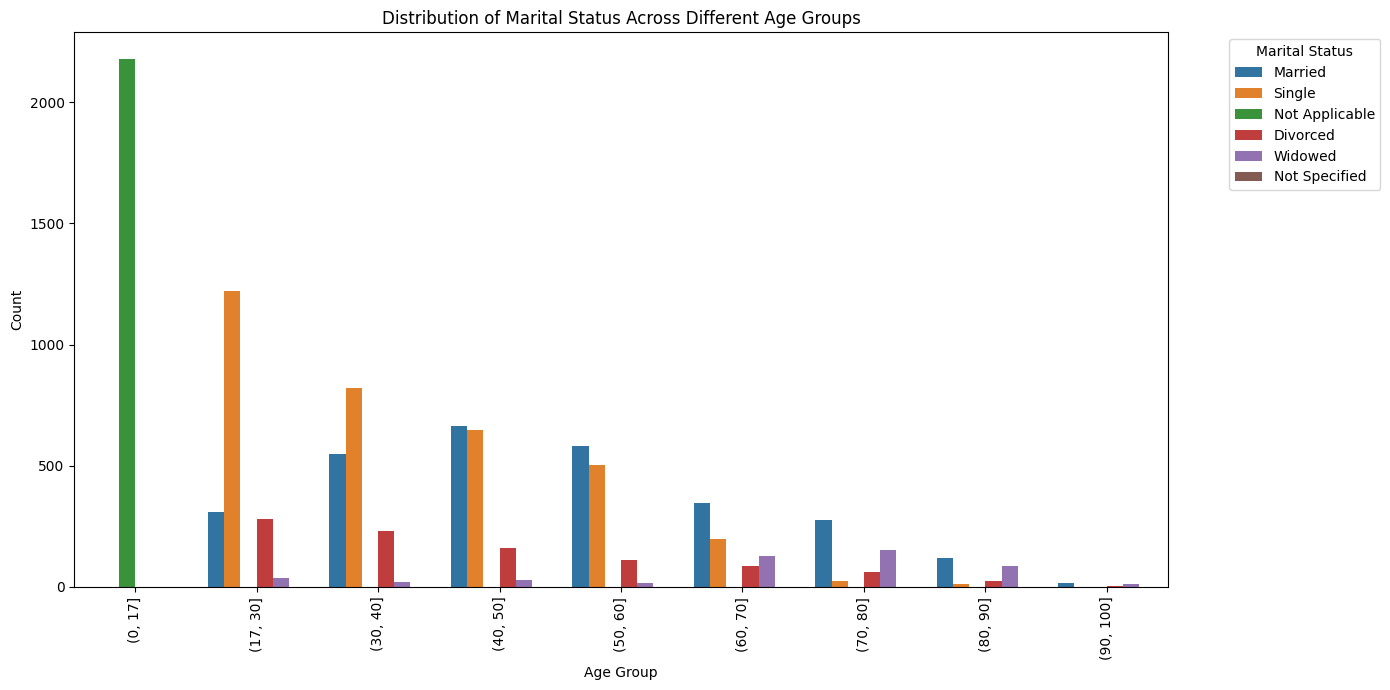

In [157]:
# This cell plots the distribution of Marital Status across Age Groups
age_bins = [0, 17, 30, 40, 50, 60, 70, 80, 90, 100]
data['Age Group'] = pd.cut(data['Age'], bins=age_bins)
plt.figure(figsize=(14, 7))
sns.countplot(x='Age Group', hue='Marital Status', data=data)
plt.title('Distribution of Marital Status Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig()
plt.show()

In [158]:
# Calculate the number of divorced individuals
divorced_count = specified_marital_status[specified_marital_status['Marital Status'] == 'Divorced'].shape[0]
# Calculate the proportion of divorced individuals
divorce_proportion = (divorced_count / total_specified_individuals) * 100
print(f"Divorce Proportion: {divorce_proportion:.2f}%")

Divorce Proportion: 9.62%


In [152]:
# Filter out individuals with 'Not Specified' marital status
specified_marital_status = data[data['Marital Status'] != 'Not Specified']
# Categorize individuals based on marital status
specified_marital_status['Living Arrangement'] = specified_marital_status['Marital Status'].apply(
    lambda x: 'Live with Family' if x in ['Married', 'Not Applicable'] else 'Live Alone')
# Calculate the percentage proportion of each living arrangement category
total_specified_individuals = specified_marital_status.shape[0]
living_arrangement_proportions = (living_arrangement_counts / total_specified_individuals) * 100

print(living_arrangement_proportions)

Living Arrangement
Live with Family    51.263105
Live Alone          48.736895
Name: count, dtype: float64


C:\Users\samue\AppData\Local\Temp\ipykernel_2228\1192096884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specified_marital_status['Living Arrangement'] = specified_marital_status['Marital Status'].apply(


***Commuter analysis***

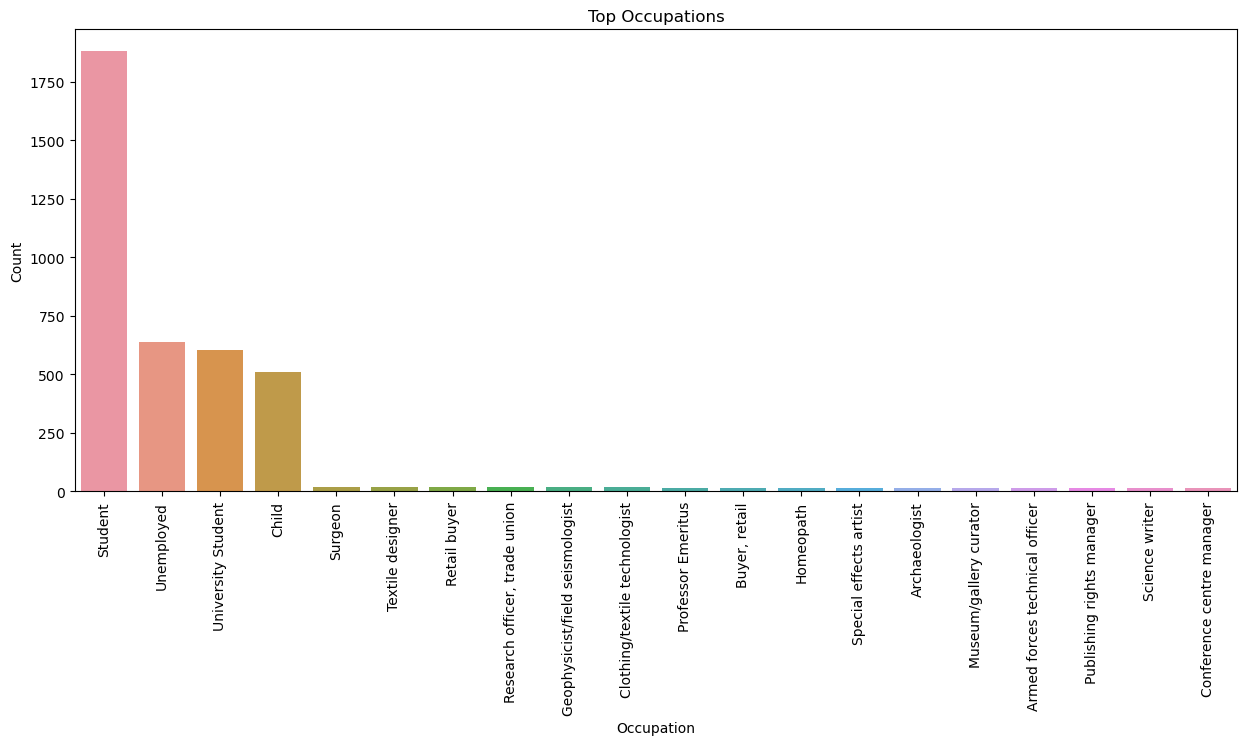

In [22]:
occupation_counts = data['Occupation'].value_counts()
top_occupations = occupation_counts.head(20)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_occupations.index, y=top_occupations.values)
plt.xticks(rotation=90)
plt.title(f'Top Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


In [23]:
data['Occupation'].unique()

array(['Unemployed', 'Conservation officer, historic buildings',
       'University Student', ..., 'Retired Writer',
       'Retired Psychologist, clinical', "Retired Barrister's clerk"],
      dtype=object)

In [24]:
data.loc[data['Occupation']=='Student']['Age'].unique()

array([16,  9, 15, 14, 10, 17,  6, 11, 13,  7, 12,  5,  8, 18])

Number of potential commuters: 6004
Proportion of potential commuters: 59.94%


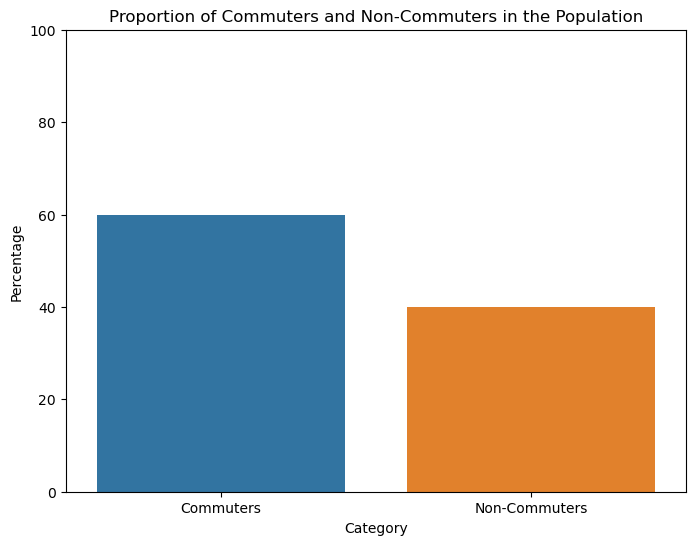

In [25]:
# This cell provides logic that determine the proportion of the people in the town that are commuters
filtered_occupation = data[~data['Occupation'].isin(['Unemployed', 'Child'])]
working_age_data = filtered_occupation[(filtered_occupation['Age'] >= 18) & (filtered_occupation['Age'] <= 65)]

number_of_commuters = working_age_data.shape[0]
total_population = data.shape[0]
commuter_proportion = number_of_commuters / total_population

print(f"Number of potential commuters: {number_of_commuters}")
print(f"Proportion of potential commuters: {commuter_proportion:.2%}")

# Prepare data for visualization
category_data = pd.DataFrame({
    'Category': ['Commuters', 'Non-Commuters'],
    'Count': [number_of_commuters, total_population - number_of_commuters]})

# Calculate percentage for visualization
category_data['Percentage'] = (category_data['Count'] / total_population) * 100

# Visualize to see the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Percentage', data=category_data)
plt.title('Proportion of Commuters and Non-Commuters in the Population')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

***Religion Analysis***

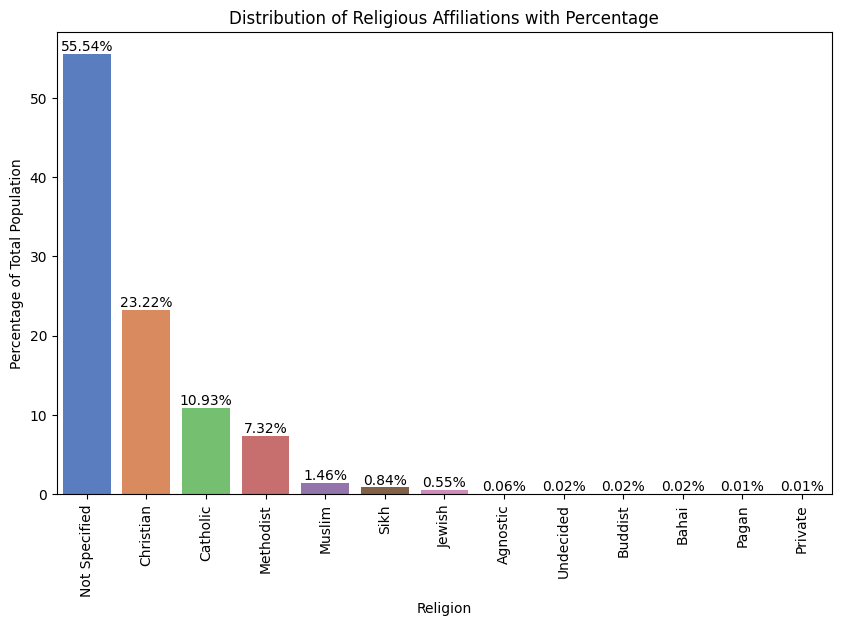

In [86]:
# Calculate the count of each religion
religion_counts = data['Religion'].value_counts()

# Calculate percentages
total = religion_counts.sum()
religion_percentages = (religion_counts / total * 100).round(2)
# Plotting
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=religion_percentages.index, y=religion_percentages.values, palette="muted")
plt.title('Distribution of Religious Affiliations with Percentage')
plt.xlabel('Religion')
plt.ylabel('Percentage of Total Population')

# Add percentages on top of each bar
for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


In [92]:
#  Determining the potential maternal cases
potential_maternity_needs = data[(data['Gender'] == 'Female') & (data['Age'] >= 15) & (data['Age'] <= 49)]
# Count of potential maternity needs
maternity_needs_count = potential_maternity_needs.shape[0]

total_population = data.shape[0]
injury_proportion = (injury_case_count / total_population) * 100
maternity_proportion = (maternity_needs_count / total_population) * 100

print(f"Number of potential maternity cases: {maternity_needs_count}, Proportion: {maternity_proportion:.2f}%")


Number of potential maternity cases: 2877, Proportion: 28.72%


In [144]:
# data['Infirmity'].value_counts()

Infirmity
Not Specified          9935
Physical Disability      21
Blind                    18
Mental Disability        11
                          9
Disabled                  8
Deaf                      8
Unknown Infection         6
Name: count, dtype: int64

Unemployment Rate

In [94]:
# Filter out the working-age population (typically 18-65 years old)
working_age_population = data[(data['Age'] >= 18) & (data['Age'] <= 65)]

# Calculating the unemployment rate
unemployed_population = working_age_population[working_age_population['Occupation'] == 'Unemployed']
unemployment_rate = (len(unemployed_population) / len(working_age_population)) * 100
print(f"Unemployment Rate: {unemployment_rate:.2f}%")


Unemployment Rate: 8.95%


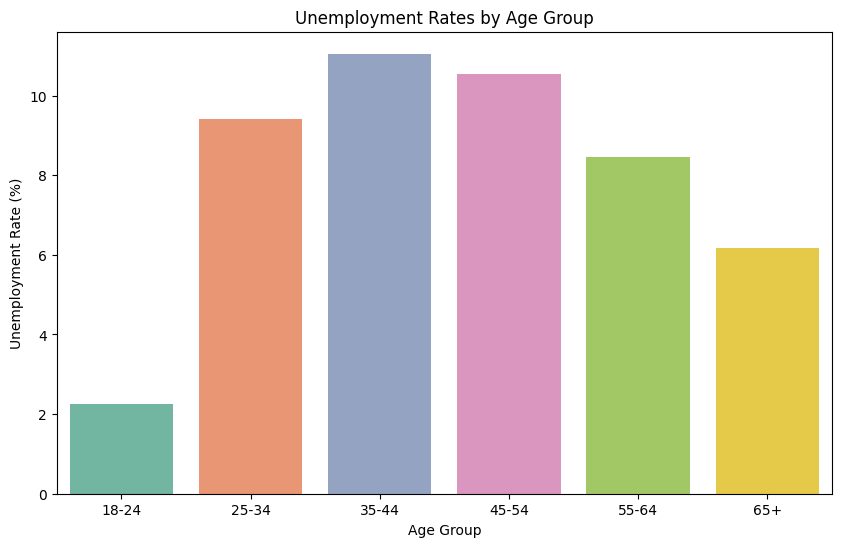

In [95]:

# Define age bins
bins = [18, 24, 34, 44, 54, 64, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate unemployment rate
age_group_unemployment = data.groupby('Age Group')['Occupation'].apply(lambda x: (x == 'Unemployed').mean())

# Convert to percentage
age_group_unemployment = age_group_unemployment * 100

# Reset index to make 'Age Group' a column again
age_group_unemployment = age_group_unemployment.reset_index()

# Rename columns for clarity
age_group_unemployment.columns = ['Age Group', 'Unemployment Rate']

# Plotting the unemployment rates by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Unemployment Rate', data=age_group_unemployment, palette='Set2')
plt.title('Unemployment Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.show()


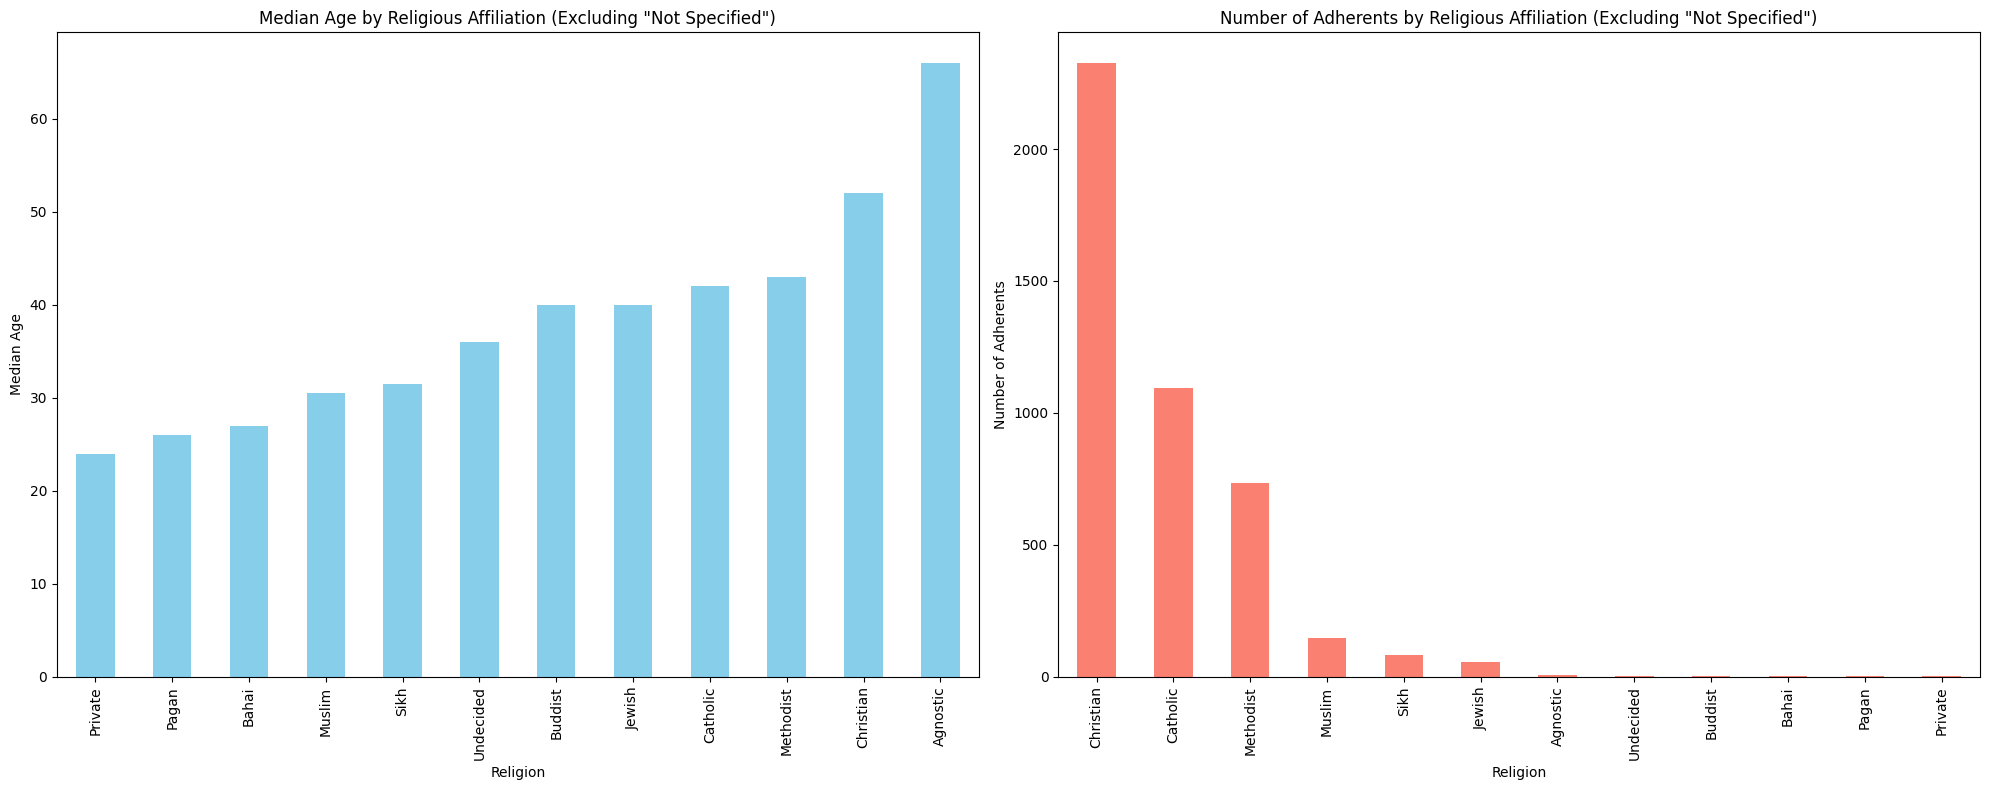

In [102]:
# Filter out 'Not Specified' from the 'Religion' column
filtered_data = data[data['Religion'] != 'Not Specified']

# Calculate median age by religion for the filtered data
religion_median_ages_filtered = filtered_data.groupby('Religion')['Age'].median().sort_values()

# Count the number of adherents for each religion for the filtered data
religion_counts_filtered = filtered_data['Religion'].value_counts()

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Median Age by Religious Affiliation for filtered data
religion_median_ages_filtered.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Median Age by Religious Affiliation (Excluding "Not Specified")')
axes[0].set_xlabel('Religion')
axes[0].set_ylabel('Median Age')
axes[0].tick_params(axis='x', rotation=90)

# Number of Adherents by Religious Affiliation for filtered data
religion_counts_filtered.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Number of Adherents by Religious Affiliation (Excluding "Not Specified")')
axes[1].set_xlabel('Religion')
axes[1].set_ylabel('Number of Adherents')
axes[1].tick_params(axis='x', rotation=90)
# Adjust the layout
plt.tight_layout()
plt.show()


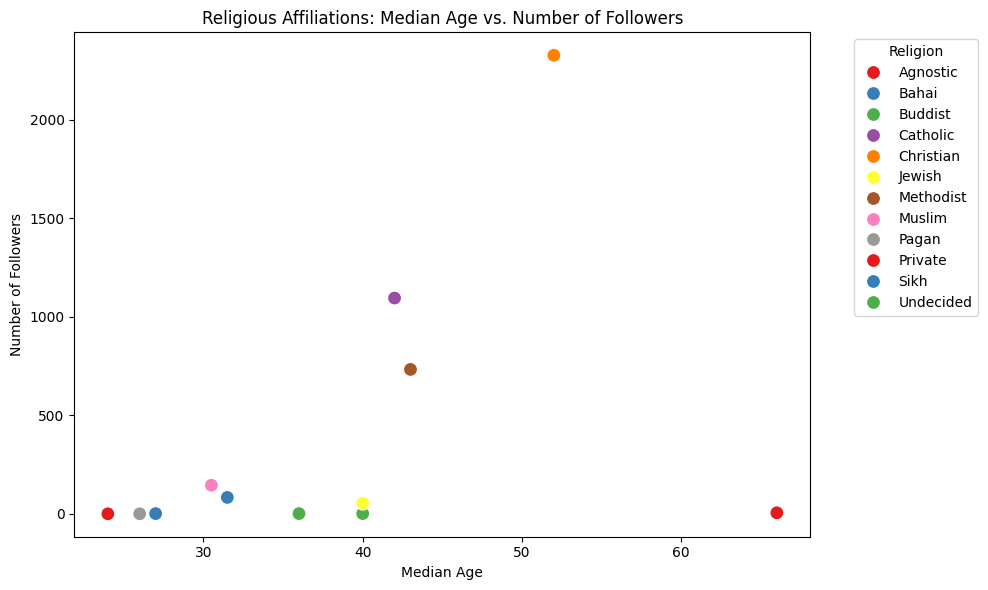

In [116]:
# Filter out 'Not Specified' from the 'Religion' column
filtered_data = data[data['Religion'] != 'Not Specified']

# Calculate median age by religion for the filtered data
religion_median_ages_filtered = filtered_data.groupby('Religion')['Age'].median()

# Count the number of adherents for each religion for the filtered data
religion_counts_filtered = filtered_data['Religion'].value_counts()

# Merge the two series into a DataFrame for plotting
religion_merged = pd.DataFrame({
    'Median Age': religion_median_ages_filtered,
    'Number of Followers': religion_counts_filtered
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Median Age', y='Number of Followers', hue='Religion', data=religion_merged, s=100, palette='Set1')

plt.title('Religious Affiliations: Median Age vs. Number of Followers')
plt.xlabel('Median Age')
plt.ylabel('Number of Followers')
plt.legend(title='Religion', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


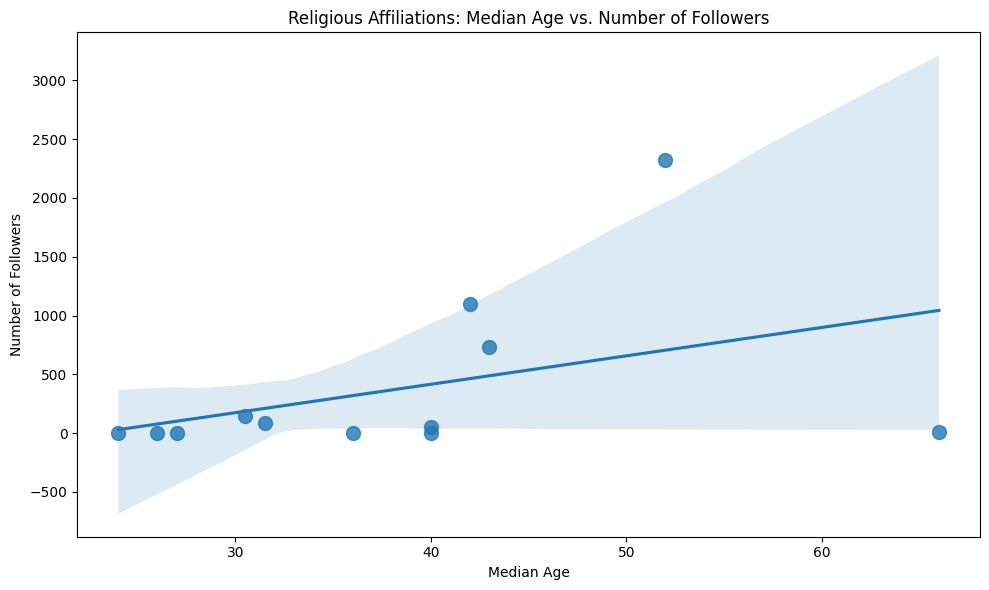

In [130]:
# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Median Age', y='Number of Followers', data=religion_merged, scatter_kws={'s':100})
plt.title('Religious Affiliations: Median Age vs. Number of Followers')
plt.xlabel('Median Age')
plt.ylabel('Number of Followers')
plt.tight_layout()
plt.show()


In [111]:
# Subseting for Agnostic in religion
data.loc[data['Religion']=='Agnostic']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
2509,24,Fleming Bridge,Bruce,Chapman,95,Head,Widowed,Male,"Retired Accountant, chartered certified",Not Specified,Agnostic,NaN
4307,57,Goodluck Mall,Sara,Wilson,43,Head,Single,Female,"Designer, furniture",Not Specified,Agnostic,35-44
6899,3,Merlin Forest,Nicole,Jones,87,Head,Married,Female,"Retired Accountant, chartered public finance",Not Specified,Agnostic,NaN
6900,3,Merlin Forest,Patrick,Jones-Evans,86,Husband,Married,Male,Retired Exercise physiologist,Not Specified,Agnostic,NaN
6901,3,Merlin Forest,Jason,Jones-Evans,46,Son,Divorced,Male,Retail manager,Not Specified,Agnostic,45-54
6902,3,Merlin Forest,George,Jones-Evans,45,Son,Single,Male,Customer service manager,Not Specified,Agnostic,45-54


***Birth rate and Death rate analysis***

In [220]:
# Initialize a dictionary to store birth rates
birth_rates = {}

# Check previous birth rates
for age in [0, 4, 9, 14, 19, 24]:
    children_count = data[data['Age'] == age].shape[0]
    females_age_group = data[(data['Age'] >= (25 + age)) & (data['Age'] <= (29 + age)) & (data['Gender'] == 'Female')].shape[0]
    birth_rate = children_count / females_age_group*1000 if females_age_group else 0
    birth_rates[f'{25 + age}-{29 + age}'] = float(f'{birth_rate:.2f}')
    
# Projection for future birth rates based on the number of younger female generations in the dataset.
projection_age_groups = [4, 9, 14, 19, 24]
for age in projection_age_groups:
    # Assuming the number of children aged 0 remains constant in the future
    projected_females_age_group = data[(data['Age'] >= (25 - age)) & (data['Age'] <= (29 - age)) & (data['Gender'] == 'Female')].shape[0]
    projected_birth_rate = children_aged_0 / projected_females_age_group*1000 if projected_females_age_group else 0
    birth_rates[f'Projections {25 - age}-{29 - age}'] = float(f'{projected_birth_rate:.2f}')


In [221]:
birth_rates

{'25-29': 228.12,
 '29-33': 274.31,
 '34-38': 282.11,
 '39-43': 268.54,
 '44-48': 394.87,
 '49-53': 287.92,
 'Projections 21-25': 237.57,
 'Projections 16-20': 205.74,
 'Projections 11-15': 269.59,
 'Projections 6-10': 270.44,
 'Projections 1-5': 308.24}

In [35]:
# Viewing unique relationship to head of house values
data['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Son', 'Husband', 'Adopted Son', 'Daughter',
       'Not Specified', 'Adopted Daughter', 'Neice', 'Nephew', 'Partner',
       'Lodger', 'Grandson', 'Cousin', 'Visitor', 'Granddaughter',
       'Sibling', 'Step-Son', 'Step-Daughter', ' ',
       'Adopted Granddaughter'], dtype=object)

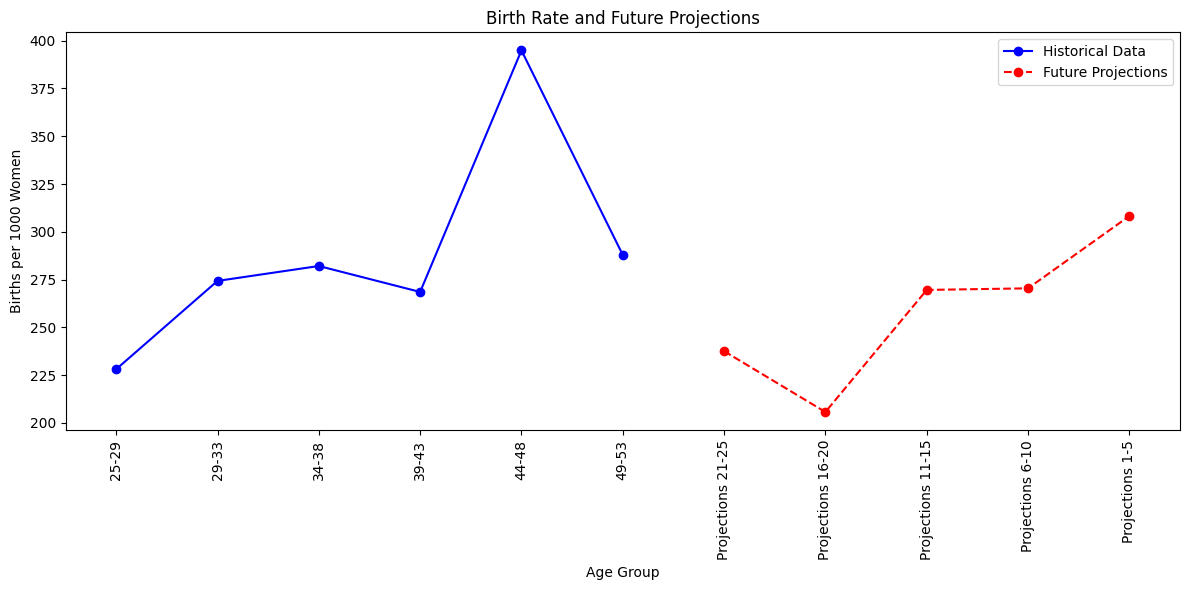

In [227]:
# Birth rates and projections data
birth_rate_data = {
    '25-29': 228.12,
    '29-33': 274.31,
    '34-38': 282.11,
    '39-43': 268.54,
    '44-48': 394.87,
    '49-53': 287.92,
    'Projections 21-25': 237.57,
    'Projections 16-20': 205.74,
    'Projections 11-15': 269.59,
    'Projections 6-10': 270.44,
    'Projections 1-5': 308.24
}

# Separate the historical data from projections
historical_keys = list(birth_rate_data.keys())[:6]
projection_keys = list(birth_rate_data.keys())[6:]

# Values for plotting
historical_values = [birth_rate_data[key] for key in historical_keys]
projection_values = [birth_rate_data[key] for key in projection_keys]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(historical_keys, historical_values, label='Historical Data', marker='o', linestyle='-', color='blue')
plt.plot(projection_keys, projection_values, label='Future Projections', marker='o', linestyle='--', color='red')
plt.title('Birth Rate and Future Projections')
plt.xlabel('Age Group')
plt.ylabel('Births per 1000 Women')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


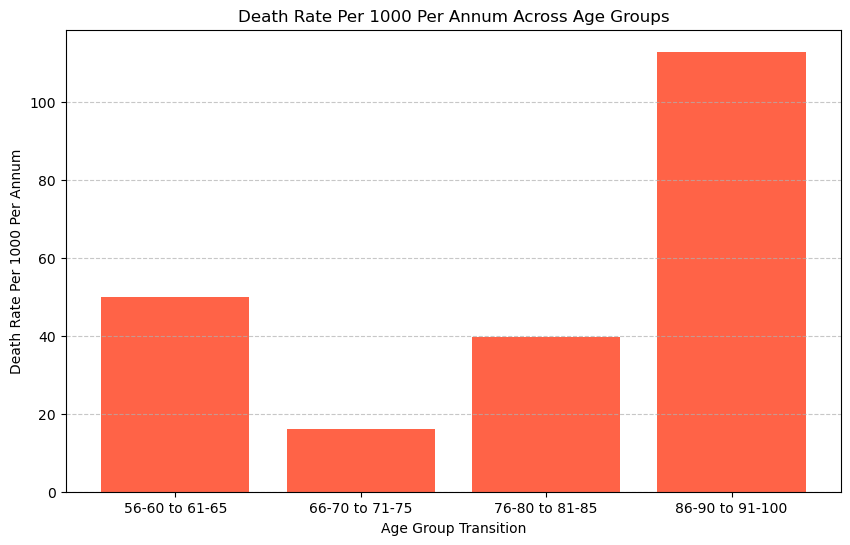

In [34]:
# Death rate analysis
# Initialize an empty dictionary to store results which we will call later during plotting
results = {}

# Loop through each pair of age ranges
for younger_start, younger_end, older_start, older_end in age_ranges:
    # Filter data for each age group
    people_younger = data[(data['Age'] >= younger_start) & (data['Age'] <= younger_end)].shape[0]
    people_older = data[(data['Age'] >= older_start) & (data['Age'] <= older_end)].shape[0]

    # Calculate the assumed deaths and death rate per 1,000 per annum
    assumed_deaths = people_younger - people_older
    death_rate_per_1k_per_annum = ((assumed_deaths / 5) / people_younger * 1000) if people_younger else 0

    # Define the age range key and store results
    age_range_key = f'{younger_start}-{younger_end} to {older_start}-{older_end}'
    results[age_range_key] = {
        'Population Younger Age Group': people_younger,
        'Population Older Age Group': people_older,
        'Assumed Deaths Over 5 Years': assumed_deaths,
        'Death Rate Per 1000 Per Annum': death_rate_per_1k_per_annum}

# Plotting
age_groups = list(results.keys())
death_rates = [info['Death Rate Per 1000 Per Annum'] for info in results.values()]

plt.figure(figsize=(10, 6))
plt.bar(age_groups, death_rates, color='tomato')
plt.title('Death Rate Per 1000 Per Annum Across Age Groups')
plt.xlabel('Age Group Transition')
plt.ylabel('Death Rate Per 1000 Per Annum')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Net population growth

In [37]:
# Finnding lodgers in the dataset
data[data['Relationship to Head of House']=='Lodger']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
52,15,Edwards Creek,Christine,Rowe,37,Lodger,Single,Female,Bookseller,Not Specified,Catholic
61,18,Edwards Creek,Robert,Barnett,35,Lodger,Widowed,Male,Air traffic controller,Not Specified,Not Specified
220,14,Outer Lane,Eileen,Parsons,22,Lodger,Single,Female,University Student,Not Specified,Not Specified
366,3,October Crescent,Ian,Harris,27,Lodger,Divorced,Male,"Engineer, aeronautical",Not Specified,Not Specified
386,8,October Crescent,Leonard,Sims,29,Lodger,Divorced,Male,Dietitian,Not Specified,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
10001,1,Hussain Institute,Bryan,Green,29,Lodger,Single,Male,Herbalist,Not Specified,Not Specified
10002,1,Hussain Institute,Lee,Long,26,Lodger,Single,Male,Claims inspector/assessor,Not Specified,Sikh
10004,1,Hussain Institute,Holly,Nelson,34,Lodger,Single,Female,"Scientist, water quality",Not Specified,Not Specified
10014,1,Rice House,Sean,George,22,Lodger,Single,Male,University Student,Not Specified,Not Specified
